In [1]:
import pandas as pd
returnsant=pd.read_csv('returnsant.csv')

In [2]:
returnsant=returnsant.drop("Factor - Value vs Growth",axis=1)
returnsant=returnsant.drop("Factor - Crowding", axis=1)
returnsant=returnsant.drop("Factor - Interest Rates",axis=1)
returnsant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perf_date                         195 non-null    object 
 1   Hedge Fund                        195 non-null    float64
 2   Factor - Low Risk                 195 non-null    float64
 3   Factor - Fixed Income Carry       195 non-null    float64
 4   Factor - Local Equity             195 non-null    float64
 5   Factor - Trend Following          195 non-null    float64
 6   Factor - Commodities              195 non-null    float64
 7   Factor - Equity                   195 non-null    float64
 8   Factor - Foreign Exchange Carry   195 non-null    float64
 9   Factor - Small Cap                195 non-null    float64
 10  Factor - Emerging Markets         195 non-null    float64
 11  Factor - Foreign Currency         195 non-null    float64
 12  Factor -

In [3]:
returnsant=returnsant.drop("perf_date",axis=1)

In [4]:
returnsant.describe()

,Hedge Fund,Factor - Low Risk,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Momentum,Factor - Quality
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.008426,0.005162,0.000084,-0.000999,0.005613,-0.001761,0.006200,-0.000083,-0.002021,-0.002571,0.001120,0.002171,0.001245,0.000228,0.005333,0.006526
std,0.029623,0.028541,0.019464,0.021516,0.026661,0.020470,0.040760,0.020065,0.018025,0.020904,0.018551,0.022432,0.018643,0.027555,0.032067,0.015723
min,-0.096051,-0.128207,-0.075152,-0.081331,-0.072346,-0.060501,-0.149934,-0.063892,-0.090379,-0.125790,-0.038892,-0.085123,-0.052001,-0.170308,-0.127459,-0.040496
25%,-0.009950,-0.011406,-0.010146,-0.014698,-0.010551,-0.013445,-0.014444,-0.010376,-0.011469,-0.013991,-0.010622,-0.008966,-0.009227,-0.009373,-0.011822,-0.001276
50%,0.008800,0.004758,0.001565,-0.000484,0.003492,-0.001189,0.012433,0.001187,-0.001049,-0.000205,0.000475,0.000509,0.004018,0.003766,0.007850,0.007147
75%,0.028000,0.023451,0.011342,0.012546,0.020816,0.011129,0.028201,0.013087,0.009227,0.010226,0.011589,0.012679,0.012631,0.017425,0.024615,0.014936
max,0.087900,0.076999,0.065239,0.056810,0.102276,0.058252,0.115115,0.071994,0.069783,0.037207,0.067272,0.081401,0.040368,0.057066,0.124979,0.084840


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(returnsant.drop("Hedge Fund", axis= 1),returnsant["Hedge Fund"])

In [90]:
import numpy as np
from random import randrange
from itertools import chain
class Node:

    def __init__(self, x, y, idxs):
        min_leaf=5
        self.x = x 
        self.y = y
        self.X_test=X_test
        print(idxs.shape)
        #idxs=list(idxs)
        self.idxs = idxs
        #print(self.idxs)
        self.min_leaf = min_leaf
        self.row_count = len(self.idxs)
        self.col_count = np.array(x).shape[1]
        self.val = np.mean(y.iloc[(self.idxs)])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for c in range(self.col_count): self.find_better_split(c)
        if self.is_leaf: return
        x = np.array(self.split_col)
        #print(x)
        #print(x)
        # give the indices which are above and below the split 
        lhs = np.nonzero(x <= self.split)[0]
        #print(lhs)
        rhs = np.nonzero(x > self.split)[0]
        # update the class
        #print(self.x)
        #print(self.y)
        #self.idxs=pd.DataFrame(self.idxs)

        #print(self.idxs.iloc[rhs])
        #print(np.array(self.idxs).reshape(-1,1))
        #print(np.array(self.idxs.iloc[lhs]).reshape(-1,1))
        self.idxs=pd.DataFrame(self.idxs)
        self.lhs = Node(self.x, self.y, np.array(self.idxs.iloc[lhs,0]))
        self.rhs = Node(self.x, self.y, np.array(self.idxs.iloc[rhs,0]))
        
    def find_better_split(self, var_idx):
        # oobtain the dataset looping through coloumn and now row_count
        # to find the split we compare the score then update self.score 
        # for the next loop
        #print(self.idxs.shape())
        #print(pd.DataFrame(self.x).iloc[np.arange(len(self.y)), var_idx])
        x = pd.DataFrame(self.x).iloc[self.idxs, var_idx]
        x=np.array(x)
        for r in range(self.row_count):
            lhs = x <= x[r]
            rhs = x > x[r]
            if rhs.sum() < self.min_leaf or lhs.sum() < self.min_leaf: continue

            curr_score = self.find_score(lhs, rhs)
            if curr_score < self.score: 
                self.var_idx = var_idx
                self.score = curr_score
                self.split = x[r]
                
    def find_score(self, lhs, rhs):
        y = self.y.iloc[self.idxs]
        lhs_std = y.iloc[lhs].std()
        rhs_std = y.iloc[rhs].std()
        return np.array(lhs_std * lhs.sum() + rhs_std * rhs.sum())
                
    @property
    def split_col(self): return pd.DataFrame(self.x).iloc[self.idxs,self.var_idx]
                
    @property
    def is_leaf(self): return self.score == float('inf')                

    def predict(self,x):
        return np.array([self.predict_row(xi) for xi in x.values])

    def predict_row(self,xi):
        if self.is_leaf: return self.val
        #print(self.var_idx)
        #print(xi)
        #print(xi)
        #print(self.split)
        #print(xi)
        #print(self.lhs)
        #print(self.rhs)
        node = self.lhs if xi[self.var_idx] <= self.split else self.rhs
        return node.predict_row(xi)

In [91]:
def subsample(dataset, ratio=1.0):
    sample = list()
    n_sample = round(len(dataset) * ratio)
    stuff=[]
    while len(sample) < n_sample:
        index = randrange(len(dataset))
        stuff.append(index)
        sample.append(dataset.iloc[index])

    return np.array(sample),np.array(stuff)


class RandomTreeRegressor:
    def fit(self, X, y, min_leaf = 5):
        self.dtree = Node(X, y, (np.arange(len(y))))
        return self
    def trees(self, X, y,min_leaf=5):
        n_trees=5
        trees=[]
        skrt=np.array(np.arange(len(y)))
        
        #print(index)
        for i in range(n_trees):
            sample,index =subsample(X)
            trees.append(Node(sample,y.iloc[index],index))
        return trees
    def bootstrap(self,trees,X_test):
        #print(trees)
        predictions=[]
        for tree in (trees):
            predictions.append(tree.predict(X_test))
        predictions=np.array(predictions).reshape(-1,1)
        
        predictions=chain.from_iterable(predictions)
        predictions=tuple(predictions)
        return predictions
    
    def predictions(self,X,y,X_test):
        n_trees=5
        predictions=[self.bootstrap(self.trees(X,y,n_trees),X_test)]
        return predictions
    
    
class DecisionTreeRegressor:
  
    def fit(self, X, y, min_leaf = 5):
        self.dtree = Node(X, y, np.array(np.arange(len(y))))
        return self
  
    def predict(self, X):
        return self.dtree.predict(X.values)

In [92]:
burger=RandomTreeRegressor().fit(X_train,pd.DataFrame(y_train))

(146,)
(50,)
(11,)
(5,)
(6,)
(39,)
(34,)
(10,)
(5,)
(5,)
(24,)
(12,)
(6,)
(6,)
(12,)
(5,)
(7,)
(5,)
(96,)
(17,)
(9,)
(8,)
(79,)
(16,)
(11,)
(5,)
(6,)
(5,)
(63,)
(8,)
(55,)
(50,)
(17,)
(7,)
(10,)
(5,)
(5,)
(33,)
(5,)
(28,)
(7,)
(21,)
(8,)
(13,)
(6,)
(7,)
(5,)


In [60]:
er=burger.predictions(X_train,pd.DataFrame(y_train),X_test)

(146,)
(35,)
(26,)
(10,)
(5,)
(5,)
(16,)
(10,)
(6,)
(9,)
(111,)
(5,)
(106,)
(100,)
(16,)
(8,)
(8,)
(84,)
(14,)
(9,)
(5,)
(70,)
(47,)
(42,)
(30,)
(19,)
(7,)
(12,)
(5,)
(7,)
(11,)
(6,)
(5,)
(12,)
(5,)
(7,)
(5,)
(23,)
(12,)
(7,)
(5,)
(11,)
(5,)
(6,)
(6,)
(146,)
(24,)
(16,)
(11,)
(5,)
(6,)
(5,)
(8,)
(122,)
(7,)
(115,)
(104,)
(26,)
(5,)
(21,)
(9,)
(12,)
(5,)
(7,)
(78,)
(21,)
(8,)
(13,)
(7,)
(6,)
(57,)
(14,)
(8,)
(6,)
(43,)
(22,)
(13,)
(8,)
(5,)
(9,)
(21,)
(5,)
(16,)
(5,)
(11,)
(6,)
(5,)
(11,)
(6,)
(5,)
(146,)
(44,)
(39,)
(29,)
(24,)
(8,)
(16,)
(11,)
(6,)
(5,)
(5,)
(5,)
(10,)
(5,)
(5,)
(5,)
(102,)
(25,)
(19,)
(7,)
(12,)
(5,)
(7,)
(6,)
(77,)
(29,)
(13,)
(16,)
(5,)
(11,)
(6,)
(5,)
(48,)
(8,)
(40,)
(14,)
(7,)
(7,)
(26,)
(17,)
(6,)
(11,)
(6,)
(5,)
(9,)
(146,)
(65,)
(41,)
(9,)
(32,)
(18,)
(6,)
(12,)
(7,)
(5,)
(14,)
(5,)
(9,)
(24,)
(5,)
(19,)
(9,)
(10,)
(5,)
(5,)
(81,)
(7,)
(74,)
(48,)
(26,)
(16,)
(6,)
(10,)
(10,)
(5,)
(5,)
(22,)
(9,)
(13,)
(7,)
(6,)
(26,)
(16,)
(6,)
(10,)
(10,)
(5,)
(5,)
(146,)
(

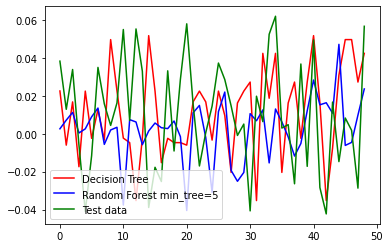

In [86]:
import matplotlib.pyplot as plt
resultovert=(np.array(er)).reshape(49,5)
forecast=[]
for i in range(len(resultovert)):
    forecast.append(np.mean(resultovert[i,:]))
plt.plot(blrt[0:49],c='r',label='Decision Tree')
plt.plot(forecast,c='b',label='Random Forest min_tree=5')
plt.plot(np.array(y_test).reshape(-1,1),c='g',label='Test data')
plt.legend(loc='lower left')


In [17]:
skrt=DecisionTreeRegressor().fit(X_train,pd.DataFrame(y_train))

(146,)
(50,)
(11,)
(5,)
(6,)
(39,)
(34,)
(10,)
(5,)
(5,)
(24,)
(12,)
(6,)
(6,)
(12,)
(5,)
(7,)
(5,)
(96,)
(17,)
(9,)
(8,)
(79,)
(16,)
(11,)
(5,)
(6,)
(5,)
(63,)
(8,)
(55,)
(50,)
(17,)
(7,)
(10,)
(5,)
(5,)
(33,)
(5,)
(28,)
(7,)
(21,)
(8,)
(13,)
(6,)
(7,)
(5,)


In [100]:
blrt=skrt.predict(X_train)
print(len(blrt))

146


In [ ]:
residuals=pd.DataFrame((np.array(y_test).reshape(-1,1)-np.array(reg).reshape(-1,1)))

In [ ]:
residuals.plot(kind='kde')

In [ ]:
np.nonzero(np.array(residuals) > 0)[0]

In [ ]:
residuals.iloc[[ 0,  2,  5,  8,  9, 10, 11, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       26, 27, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 45]]

In [99]:
print(residuals.shape[0])

NameError: name 'residuals' is not defined

In [ ]:
residuals=np.array(residuals)
for r in range(0,len(residuals)):

    lhs = residuals <= residuals[r]
    rhs = residuals > residuals
print(lhs)


TypeError: __init__() got an unexpected keyword argument 'axis'

,Hedge Fund,Factor - Low Risk,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Momentum,Factor - Quality
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.008426,0.005162,0.000084,-0.000999,0.005613,-0.001761,0.006200,-0.000083,-0.002021,-0.002571,0.001120,0.002171,0.001245,0.000228,0.005333,0.006526
std,0.029623,0.028541,0.019464,0.021516,0.026661,0.020470,0.040760,0.020065,0.018025,0.020904,0.018551,0.022432,0.018643,0.027555,0.032067,0.015723
min,-0.096051,-0.128207,-0.075152,-0.081331,-0.072346,-0.060501,-0.149934,-0.063892,-0.090379,-0.125790,-0.038892,-0.085123,-0.052001,-0.170308,-0.127459,-0.040496
25%,-0.009950,-0.011406,-0.010146,-0.014698,-0.010551,-0.013445,-0.014444,-0.010376,-0.011469,-0.013991,-0.010622,-0.008966,-0.009227,-0.009373,-0.011822,-0.001276
50%,0.008800,0.004758,0.001565,-0.000484,0.003492,-0.001189,0.012433,0.001187,-0.001049,-0.000205,0.000475,0.000509,0.004018,0.003766,0.007850,0.007147
75%,0.028000,0.023451,0.011342,0.012546,0.020816,0.011129,0.028201,0.013087,0.009227,0.010226,0.011589,0.012679,0.012631,0.017425,0.024615,0.014936
max,0.087900,0.076999,0.065239,0.056810,0.102276,0.058252,0.115115,0.071994,0.069783,0.037207,0.067272,0.081401,0.040368,0.057066,0.124979,0.084840


In [106]:
result=returnsant.to_csv('anomalyfreereturns.csv')